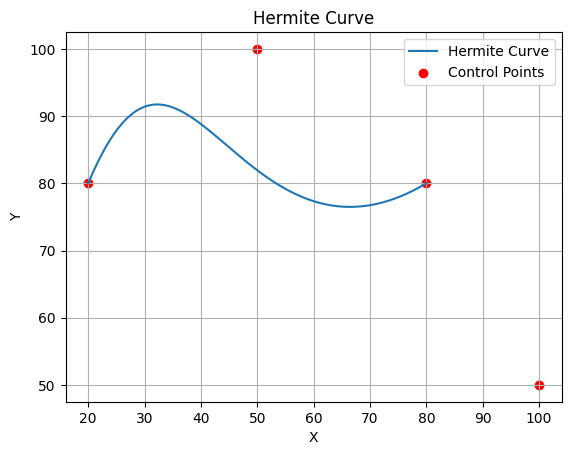

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def make_hermite(xys):
    n = len(xys)
    def hermite(ts):
        result = []
        for t in ts:
            h00 = 2 * t**3 - 3 * t**2 + 1
            h10 = t**3 - 2 * t**2 + t
            h01 = -2 * t**3 + 3 * t**2
            h11 = t**3 - t**2
            result.append(tuple(sum([h * p for h, p in zip([h00, h10, h01, h11], ps)]) for ps in zip(*xys)))
        return result

    return hermite

if __name__ == '__main__':
    ts = np.linspace(0.0, 1.0, 1000)
    xys = [(20, 80), (50, 100), (80, 80), (100, 50)]  # Example control points
    hermite = make_hermite(xys)
    points = hermite(ts)

    plt.plot(*zip(*points), label='Hermite Curve')
    plt.scatter(*zip(*xys), color='red', label='Control Points')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hermite Curve')
    plt.grid(True)
    plt.show()


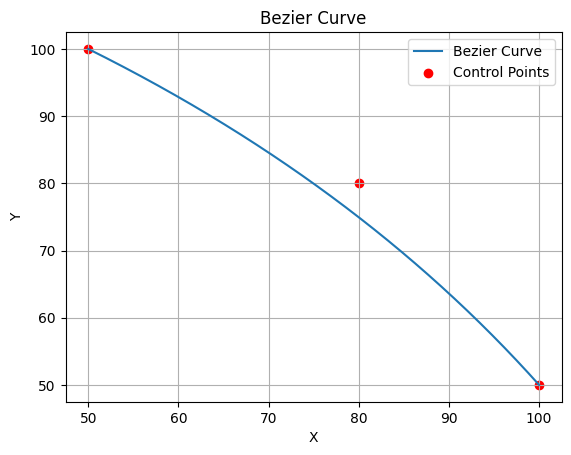

In [4]:
def make_bezier(xys):
    n = len(xys)
    def bezier(ts):
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1 - t)**i for i in range(n)])
            coefs = [c * a * b for c, a, b in zip(pascal_row(n - 1), tpowers, upowers)]
            result.append(tuple(sum([coef * p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result

    return bezier

def pascal_row(n):
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n // 2 + 1):
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n & 1 == 0:  # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result))
    return result

if __name__ == '__main__':
    ts = np.linspace(0.0, 1.0, 1000)
    xys = [(50, 100), (80, 80), (100, 50)]  # Example control points
    bezier = make_bezier(xys)
    points = bezier(ts)

    plt.plot(*zip(*points), label='Bezier Curve')
    plt.scatter(*zip(*xys), color='red', label='Control Points')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Bezier Curve')
    plt.grid(True)
    plt.show()
